In [190]:
import  urllib.robotparser as rp
import requests
from itertools import chain

import pandas as pd
import time
import requests
from pprint import pprint
from bs4 import BeautifulSoup
from pprint import pprint

import json
from lxml import html
import re
import csv
import itertools
from textblob import TextBlob, Word 
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords, wordnet
from functools import reduce

In [50]:
class Scrape_All:
    def __init__(self, url):
        response=requests.get(url)
        page=response.content
        page=BeautifulSoup(page, "html.parser")
        self.url=url
        self.page=page
    def get_hrefs(self):
        a_hrefs=[i.get("href") for i in self.page.find_all("a")]
        a_hrefs=[x for x in a_hrefs if x is not None]
        a_hrefs_all=[]
        for i in a_hrefs:
            if not (i.startswith("http://") or i.startswith("https://")):
                i = url+i
            a_hrefs_all.append(i)
        return a_hrefs_all
    def head_par_ord(self): 
        '''This function returns both headings and their corresponding paragraphs
        and the next one headings and paragraphs separately '''
        headings=self.page.find_all(re.compile('^h[1-6]$'))
        merged=""
        for header in headings:
            merged+=header.get_text() + "\n"
            for i in header.next_siblings: # find the next sibling, which can be either header or paragraph
                if i.name and i.name.startswith('h'): #if 
                    # stop at next header
                    break
                elif i.name == 'p':
                    merged+=i.get_text() + "\n"
        return print(merged)
    def head_par_unord(self):
        headings_1= [i.get_text() for i in self.page.find_all(re.compile('^h[1-6]$'))]
        paragraphs_1=[i.get_text() for i in self.page.find_all("p")]
        return print("\n".join(headings_1+paragraphs_1))

    def user_tag(self):
        '''method returning any kind of user-defined tag with or without customized names'''
        tag=input("Please, enter the tag name")
        attribute_type =input("Please enter selector type: class, id, etc if needed")
        attribute_name=input("Please enter selector name if needed ") 
        return [i.get_text() for i in self.page.find_all(tag, attrs={attribute_type:attribute_name})]
          

In [51]:
url='https://en.wikipedia.org/wiki/Eminem'
my_scraper=Scrape_All(url)

In [52]:
my_scraper.user_tag()

Please, enter the tag namespan
Please enter selector type: class, id, etc if needed
Please enter selector name if needed 


['Eminem',
 'Marshall Bruce Mathers III',
 ' (1972-10-17) ',
 '1972-10-17',
 ' (age\xa045)',
 'St. Joseph, Missouri, U.S.',
 'Spouse(s)',
 'Kimberly Anne Scott (m.\xa01999; div.\xa02001)',
 ' (m.\xa02006; div.\xa02006)',
 'Associated acts',
 'eminem.com',
 'shadyrecords.com',
 '',
 '1',
 'Life and career',
 '1.1',
 '1972–1991: Early life',
 '1.2',
 '1992–1997: Early career, Infinite and family struggles',
 '1.3',
 '1998–1999: Introduction to Slim Shady, The Slim Shady LP and rise to success',
 '1.4',
 '2000–2002: The Marshall Mathers LP, lyrical conflicts and The Eminem Show',
 '1.5',
 '2003–2007: Encore, more lyrical conflicts and musical hiatus',
 '1.6',
 '2008–2009: Comeback, Relapse and Refill',
 '1.7',
 '2010–2011: Recovery and Bad Meets Evil reunion',
 '1.8',
 '2012–2013: The Marshall Mathers LP 2',
 '1.9',
 '2014–2016: Shady XV, vinyl box set, and Southpaw',
 '1.10',
 '2017–present: Revival',
 '2',
 'Artistry',
 '2.1',
 'Influences, style, and rapping technique',
 '2.2',
 'Alter

### 1.a. hyperlinks a and provide the absolute link if relative one is given in the page

In [4]:
url="https://en.wikipedia.org/wiki/Eminem"
response=requests.get(url)
page=response.content #(kam content)
page=BeautifulSoup(page, "html.parser")

In [14]:
a_hrefs=[i.get("href") for i in page.find_all("a")]
a_hrefs=[x for x in a_hrefs if x is not None]
a_hrefs_all=[]
for i in a_hrefs:
    if not (i.startswith("http://") or i.startswith("https://")):
        i = url+i
    a_hrefs_all.append(i)

In [15]:
a_hrefs_all

['https://en.wikipedia.org/wiki/Eminem/wiki/Wikipedia:Protection_policy#semi',
 'https://en.wikipedia.org/wiki/Eminem#mw-head',
 'https://en.wikipedia.org/wiki/Eminem#p-search',
 'https://en.wikipedia.org/wiki/Eminem/wiki/Emmenin',
 'https://en.wikipedia.org/wiki/Eminem/wiki/Marshall_Mathers_(disambiguation)',
 'https://en.wikipedia.org/wiki/Eminem/wiki/Slim_Shady_(disambiguation)',
 'https://en.wikipedia.org/wiki/Eminem/wiki/File:Eminem_-_Concert_for_Valor_in_Washington,_D.C._Nov._11,_2014_(2)_(Cropped).jpg',
 'https://en.wikipedia.org/wiki/Eminem/wiki/St._Joseph,_Missouri',
 'https://en.wikipedia.org/wiki/Eminem/wiki/Rochester_Hills,_Michigan',
 'https://en.wikipedia.org/wiki/Eminem/wiki/List_of_awards_and_nominations_received_by_Eminem',
 'https://en.wikipedia.org/wiki/Eminem/wiki/Detroit,_Michigan',
 'https://en.wikipedia.org/wiki/Eminem/wiki/Hip_hop_music',
 'https://en.wikipedia.org/wiki/Eminem/wiki/Aftermath_Entertainment',
 'https://en.wikipedia.org/wiki/Eminem/wiki/Shady_Recor

### 1.b. headings and paragraphs and merge them inside one string with a new line between different headings/paragraphs, without distorting order).

In [181]:
headings=page.find_all(re.compile('^h[1-6]$'))
headings[0]

<h1 class="firstHeading" id="firstHeading" lang="en">Eminem</h1>

In [187]:

merged=""
for header in headings:
    merged+=header.get_text() + "\n"
    for elem in header.next_siblings: # find the next sibling, which can be either header or paragraph
        if elem.name and elem.name.startswith('h'): #if 
            # stop at next header
            break
        elif elem.name == 'p':
            merged+=elem.get_text() + "\n"

          

In [183]:
print(merged)

Eminem
Contents
Life and career
1972–1991: Early life
Marshall Bruce Mathers III was born on October 17, 1972,[4] in St. Joseph, Missouri, the only child of Marshall Bruce Mathers Jr. and Deborah Rae "Debbie" Nelson.[5][6][7] His mother nearly died during her 73-hour labor with him.[8] Eminem's parents were in a band called Daddy Warbucks, playing in Ramada Inns along the Dakotas–Montana border before their separation. Bruce left the family, moving to California[9] and having two other children: Michael and Sarah.[10] Debbie later had son Nathan "Nate" Kane Samara.[7] During his childhood, Eminem and Debbie shuttled between Michigan and Missouri, rarely staying in one house for more than a year or two and living primarily with family members. In Missouri, they lived in several places, including St. Joseph, Savannah, and Kansas City.[11][12]

As a teenager, Eminem wrote letters to his father; according to Debbie, all came back marked "return to sender".[9] Friends and family remember Em

### another version

In [22]:
headings_1= [i.get_text() for i in page.find_all(re.compile('^h[1-6]$'))]
paragraphs_1=[i.get_text() for i in page.find_all("p")]
print("\n".join(headings_1+paragraphs_1))
print("\n".join(map(str, itertools.chain.from_iterable(zip(headings_1, paragraphs_1)))))


### 1.3. custom tags provided by the user (i.e. if the user provides li.author or similar input then all the list items that have class author must be scraped.


In [11]:
page.find_all("li", class_="toclevel-2 tocsection-2")

[<li class="toclevel-2 tocsection-2"><a href="#1972–1991:_Early_life"><span class="tocnumber">1.1</span> <span class="toctext">1972–1991: Early life</span></a></li>]

In [20]:
tag=input("Please, enter the tag name")
attribute_type =input("Please enter selector type: class, id, etc ")
attribute_name=input("Please enter selector name ") 
[i.get_text() for i in page.find_all(tag, attrs={attribute_type:attribute_name})]

Please, enter the tag namea
Please enter selector type: class, id, etc 
Please enter selector name 


['',
 '',
 'Jump to navigation',
 'Jump to search',
 'Emmenin',
 'Marshall Mathers (disambiguation)',
 'Slim Shady (disambiguation)',
 '',
 'St. Joseph, Missouri',
 'Rochester Hills, Michigan',
 'List of awards and nominations',
 'Detroit, Michigan',
 'Hip hop',
 'Aftermath',
 'Shady',
 'Interscope',
 'Web',
 'Bad Meets Evil',
 'D12',
 'Outsidaz',
 'Soul Intent',
 '50 Cent',
 'Dr. Dre',
 'Lil Wayne',
 'Nate Dogg',
 'Obie Trice',
 'P!nk',
 'Rihanna',
 'Royce da 5\'9"',
 'Slaughterhouse',
 'Skylar Grey',
 'Trick-Trick',
 'Yelawolf',
 'eminem.com',
 'shadyrecords.com',
 'Billboard 200',
 'Billboard Hot 100',
 "world's best-selling artists of all time",
 '[1]',
 'Rolling Stone',
 'list of 100 Greatest Artists of All Time',
 'King of Hip Hop',
 'Infinite',
 'Slim Shady EP',
 'Dr. Dre',
 'Aftermath Entertainment',
 'The Slim Shady LP',
 'Grammy Award for Best Rap Album',
 'The Marshall Mathers LP',
 'The Eminem Show',
 'certified diamond',
 'Encore',
 'Relapse',
 'Recovery',
 'The Marshall M

### 2.a untilst function, that will return the unlisted version of a nested list or the same one if list was not nested,

In [28]:
type(merged)

str

In [32]:
my_blob=TextBlob(merged)

In [35]:
sentences=my_blob.sentences

[Sentence("Eminem
 Contents
 Life and career
 1972–1991: Early life
 Marshall Bruce Mathers III was born on October 17, 1972,[4] in St. Joseph, Missouri, the only child of Marshall Bruce Mathers Jr. and Deborah Rae "Debbie" Nelson."),
 Sentence("[5][6][7] His mother nearly died during her 73-hour labor with him."),
 Sentence("[8] Eminem's parents were in a band called Daddy Warbucks, playing in Ramada Inns along the Dakotas–Montana border before their separation."),
 Sentence("Bruce left the family, moving to California[9] and having two other children: Michael and Sarah."),
 Sentence("[10] Debbie later had son Nathan "Nate" Kane Samara."),
 Sentence("[7] During his childhood, Eminem and Debbie shuttled between Michigan and Missouri, rarely staying in one house for more than a year or two and living primarily with family members."),
 Sentence("In Missouri, they lived in several places, including St. Joseph, Savannah, and Kansas City."),
 Sentence("[11][12]
 
 As a teenager, Eminem wrot

In [54]:
words=my_blob.words

In [186]:
class Cleaner:
    def __init__(self,text_blob):
        text_blob=TextBlob(text_blob)
        self.text_blob=text_blob
    def sentences(self):
        sentences=self.text_blob.sentences
        return sentences
    def words(self):
        words=self.text_blob.words
        return words
    def plurulalize(self):
        plurulalize_words=[i.pluralize() for i in self.text_blob.words]
        return plurulalize_words
    def singularize(self):
        singularize_words=[i.singularize() for i in self.text_blob.words]
        return singularize_words
    def lemmatize(self):
        lemmatized=[i.lemmatize() for i in self.text_blob.words]
        return lemmatized
    def uppercase(self):
        uppercase=[i.upper() for i in self.text_blob.words]
        return uppercase
    def lowercase(self):
        lowercase=[i.lower() for i in self.text_blob.words]
        return lowercase
    def clean(self):
        sw=stopwords.words("english")
        sw_1=(["’","`","'s"])
        clean=[i for i in self.text_blob.words.lower().lemmatize() if i not in sw and i not in sw_1] 
        freq=nltk.FreqDist(clean)
        plot=freq.plot(10,cumulative=False) 
        return plot,freq  
      

In [130]:
plurulalize_words=[i.pluralize() for i in self.text_blob.words]
singularize_words=[i.singularize() for i in my_blob.words]

NameError: name 'self' is not defined

In [90]:
freq=nltk.FreqDist(clean) #textblob text, use .words


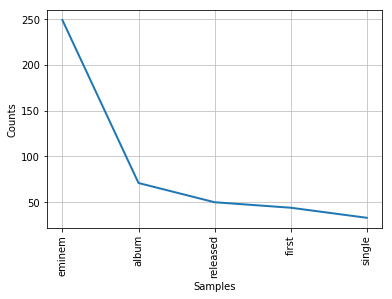

In [91]:
freq.plot(5,cumulative=False) 

In [188]:
my_clean=Cleaner(merged)

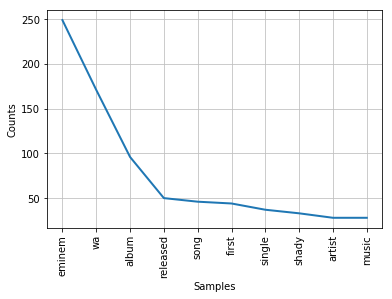

(None,
 FreqDist({'eminem': 249, 'wa': 171, 'album': 96, 'released': 50, 'song': 46, 'first': 44, 'single': 37, 'shady': 33, 'artist': 28, 'music': 28, ...}))

In [189]:
my_clean.clean()


In [176]:
string1="As a teenager, Eminem wrote letters to his father; according to Debbie, all came back marked.[9] Friends and family remember Eminem as a happy child, but ho was often bullied. One bully, De'Angelo Bailey, severely injured Eminem's head (mentioned in his sone); Debbie filed a lawsuit against the school in 1982, which was dismissed the following year because the Macomb County (Mich.) judge said the schools were immune from lawsuits.[8] Eminem spent much of his youth in a working-class, primarily black, Detroit neighborhood.[9] He and Debbie were one of three white households on their block, and Eminem was beaten by black youths several times.[9] As a child he was interested in storytelling, aspiring to be a comic-book artist before discovering hip hop.[13] Eminem heard his first rap song (, featuring Ice-T) on the Breakin' soundtrack, a gift from Debbie's half-brother Ronnie Polkinghorn, who later became a musical mentor to him. When Polkinghorn committed suicide in 1991, Eminem stopped speaking for days and did not attend his funera"

In [177]:
string1=Cleaner(string1)

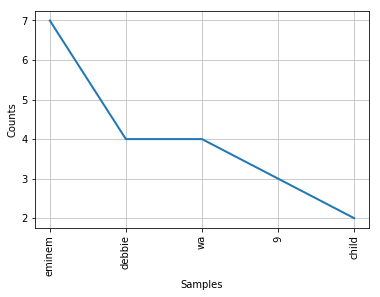

(None,
 FreqDist({'eminem': 7, 'debbie': 4, 'wa': 4, '9': 3, 'child': 2, 'one': 2, 'lawsuit': 2, 'school': 2, 'youth': 2, 'black': 2, ...}))

In [178]:
string1.clean()

In [331]:
class Super_list:
    def __init__(self,ls): #taking the argument and merging to 
        self.ls=ls
    def unlist(self):
        '''method returning the unlisted version of a nested list or the same one if list was not nested '''
        if any(isinstance(i, list) for i in self.ls)==True:
            return reduce(lambda x,y: x+y,self.ls)
        else:
            return self.ls
    def merge (self):
        '''method merging list into string both for nested and not nested lists.'''
        if any(isinstance(i, list) for i in self.ls)==True:
            return " ".join(sum(self.ls, []))
        else:
            return " ".join(self.ls)
        
    def find(self):
        '''function which will return all the list elements that include a number/letter, defined by user'''
        user_inp=input("Please write the type of elements you need to retrieve (number/letter)")
        
        if user_inp=="number":
            return [float(i) for i in self.unlist() if str(i).isdigit()==True]
   
        if user_inp=="letter":
            return [str(i) for i in self.unlist() if str(i).isalpha()==True]
           
  

In [328]:
ls=[["123"],["123","sad"],["man","yo"],["548"]]
ls1=["123", "548", 'efg']

In [329]:
ls=Super_list(ls)
ls1=Super_list(ls1)

In [278]:
ls.unlist()

['123', '123', 'sad', 'man', 'yo']

In [330]:
ls.find()


Please write the type of elements you need to retrieve (number/letter)number


[123.0, 123.0, 548.0]

In [246]:
ls.merge()

'123 123 sad man yo'

In [305]:
ls.find()

Please write the type of elements you need to retrieve (number/letter)number


123.0

In [ ]:
ls1